<a href="https://colab.research.google.com/github/Ziaullah-Mommand/Air_pollution/blob/master/China_Air_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
#import needed libraries & float format definition

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
import re
%matplotlib inline
# Reading and showing head data
air_data = pd.read_csv("beijing.csv")

air_data.drop('CityPinyan', axis=1, inplace=True)
air_data.drop('SitePinyan', axis=1, inplace=True)
air_data.drop('AQI_qualitative', axis=1, inplace=True)
    
indexNames = air_data[air_data['CityAvgAQI'] == 0 ].index
get_hyphen_aqi = air_data[air_data['AQI'] == 0 ].index
air_data.drop(indexNames , inplace=True)
air_data.head()

,id,CityEnglish,CityAvgAQI,AQI,PM2_5,PM10,CO,NO2,SO2,O3_1h,O3_8h,Date,Hours
0,18,beijing,154,155,118,139,1.4,0,2,2,91,2015-09-16,0
1,19,beijing,154,160,122,149,1.3,113,9,45,128,2015-09-16,0
2,20,beijing,154,153,117,121,1.3,123,9,48,123,2015-09-16,0
3,21,beijing,154,144,110,136,1.1,59,2,13,84,2015-09-16,0
4,22,beijing,154,133,101,123,1.4,111,5,2,99,2015-09-16,0


In [0]:
get_hyphen_aqi = air_data[air_data['AQI'] == 0 ].index
air_data.drop(get_hyphen_aqi , inplace=True)

In [0]:
get_hyphen_no2 = air_data[air_data['NO2'] == 0 ].index
air_data.drop(get_hyphen_no2 , inplace=True)

In [114]:
air_data.head()

,id,CityEnglish,CityAvgAQI,AQI,PM2_5,PM10,CO,NO2,SO2,O3_1h,O3_8h,Date,Hours
1,19,beijing,154,160,122,149,1.3,113,9,45,128,2015-09-16,0
2,20,beijing,154,153,117,121,1.3,123,9,48,123,2015-09-16,0
3,21,beijing,154,144,110,136,1.1,59,2,13,84,2015-09-16,0
4,22,beijing,154,133,101,123,1.4,111,5,2,99,2015-09-16,0
5,23,beijing,154,163,124,153,1.9,191,2,3,125,2015-09-16,0


In [0]:
aqi = air_data['AQI']
arr_aqi = np.asarray(aqi)
arr_aqi.sort()
arr_aqi

In [117]:
#aqi_int = air_data['AQI'].convert_objects(convert_numeric=True)
#aqi_int= pd.to_numeric(air_data['AQI'], errors='ignore')
aqi_mean = np.mean(air_data['AQI'])
air_data['AQI'].replace(0, aqi_mean, regex=True)

print(aqi_mean)



155.95275590551182


In [118]:
pm2_mean = np.mean(air_data['PM2_5'])
air_data['PM2_5'].replace(0, pm2_mean, regex=True)
print(pm2_mean)

117.17847769028872


In [119]:
pm10_mean = np.mean(air_data['PM10'])
air_data['PM10'].replace(0, pm10_mean, regex=True)
print(pm10_mean)

70.23359580052494


In [120]:
co = np.mean(air_data['CO'])
air_data['CO'].replace(0, co, regex=True)
print(co)

1.123228346456692


In [121]:
no2 = np.mean(air_data['NO2'])
air_data['NO2'].replace(0, no2, regex=True)
print(no2)

55.463254593175854


In [122]:
so2 = np.mean(air_data['SO2'])
air_data['SO2'].replace(0, so2, regex=True)
print(so2)

6.753280839895013


In [123]:
o3_h1 = np.mean(air_data['O3_1h'])
air_data['O3_1h'].replace(0, o3_h1, regex=True)
print(o3_h1)

81.26377952755905


In [124]:
o3_h8 = np.mean(air_data['O3_8h'])
air_data['O3_8h'].replace(0, o3_h8, regex=True)
print(o3_h8)

86.02230971128608


**`Finding outliers for AQI`**

In [125]:
cleaned_aqi = air_data['AQI'].replace(0, aqi_mean, regex=True)
arr = np.asarray(cleaned_aqi)
sorted_arr = np.sort(arr)
## finding outlires 
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outlier_datapoints = detect_outlier(sorted_arr)
print(outlier_datapoints)

[]


In [0]:
cleaned_aqi = air_data['AQI'].replace(0, aqi_mean, regex=True)
arr = np.asarray(cleaned_aqi)
sorted_arr = np.sort(arr)
q1, q3= np.percentile(sorted_arr,[25,75])


In [127]:
iqr = q3-q1
iqr

84.0

In [0]:
lower_bound = q1 - (1.5 * q1)
upper_bound = q3 + (1.5 * q3)

In [129]:
lower_bound

-60.0

In [130]:
upper_bound

510.0

In [131]:
air_data.head()

,id,CityEnglish,CityAvgAQI,AQI,PM2_5,PM10,CO,NO2,SO2,O3_1h,O3_8h,Date,Hours
1,19,beijing,154,20,122,149,1.3,113,9,45,128,2015-09-16,0
2,20,beijing,154,22,117,121,1.3,123,9,48,123,2015-09-16,0
3,21,beijing,154,23,110,136,1.1,59,2,13,84,2015-09-16,0
4,22,beijing,154,24,101,123,1.4,111,5,2,99,2015-09-16,0
5,23,beijing,154,29,124,153,1.9,191,2,3,125,2015-09-16,0


The Air Quality Index frequency  in Beijing, **2015** 

[  0  76  79 168 213 223   3]


Text(0.5, 0.98, 'Air Quality Index')

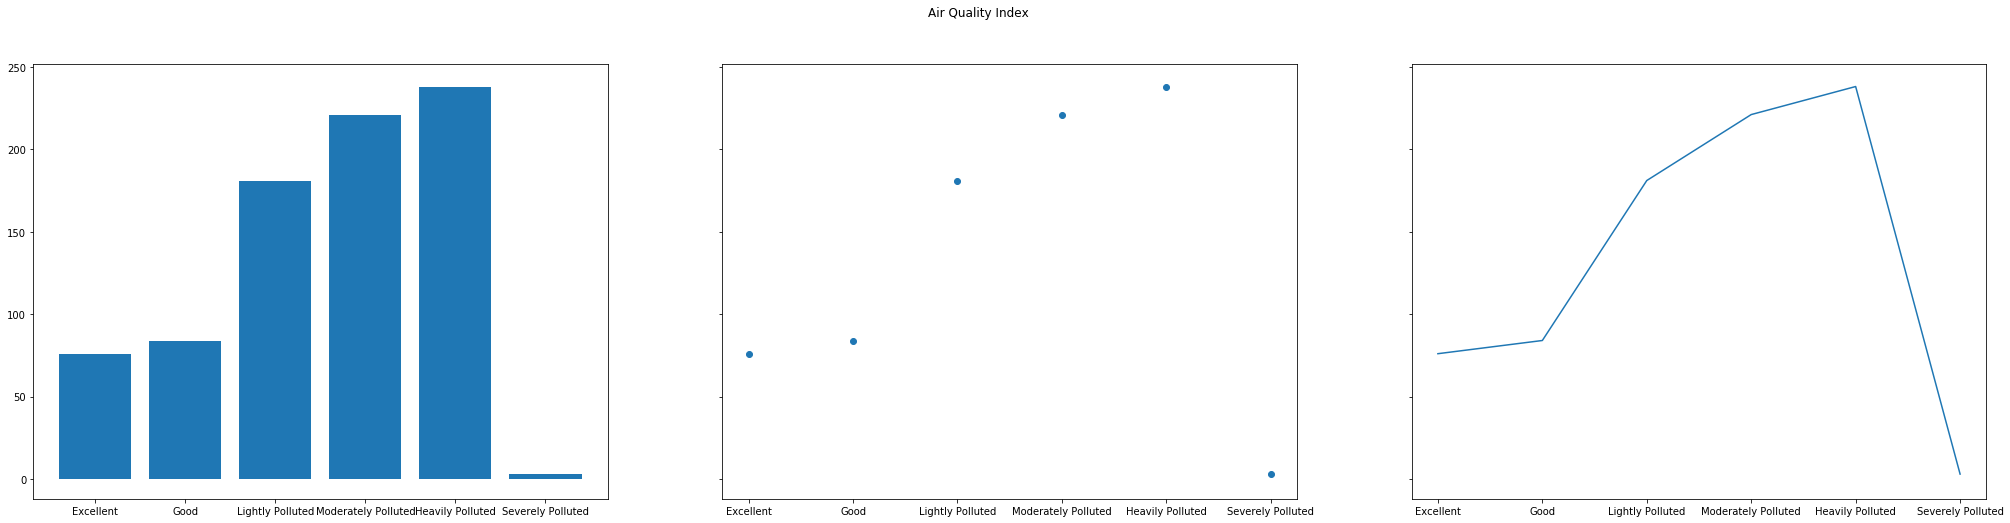

In [132]:
cleaned_aqI = air_data['AQI'].replace(0, aqi_mean, regex=True)
conds = [air_data.AQI.between(0,50), air_data.AQI.between(51,100),
         air_data.AQI.between(101,150), air_data.AQI.between(151,200), air_data.AQI.between(201,300), air_data.AQI.between(301,np.inf)]
choices = [1,2,3,4,5,6]
air_data['AQI_index'] = np.select(conds,choices, 5)
categorized_aqi =  air_data['AQI_index']
aqi_arr = air_data['AQI']
arr = np.asarray(categorized_aqi)
freq = np.bincount(arr)
print(freq)
data = {'Excellent': 76, 'Good':84, 'Lightly Polluted' :181, 'Moderately Polluted':221, 'Heavily Polluted':238, 'Severely Polluted':3}
names = list(data.keys())
values = list(data.values())
fig, axs = plt.subplots(1, 3, figsize=(35, 8), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Air Quality Index')

In [133]:
air_data['Date'].unique()

array(['2015-09-16', '2015-09-17', '2015-09-18'], dtype=object)

In [134]:
air_data.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            830, 831, 832, 833, 834, 835, 836, 837, 838, 839],
           dtype='int64', length=762)

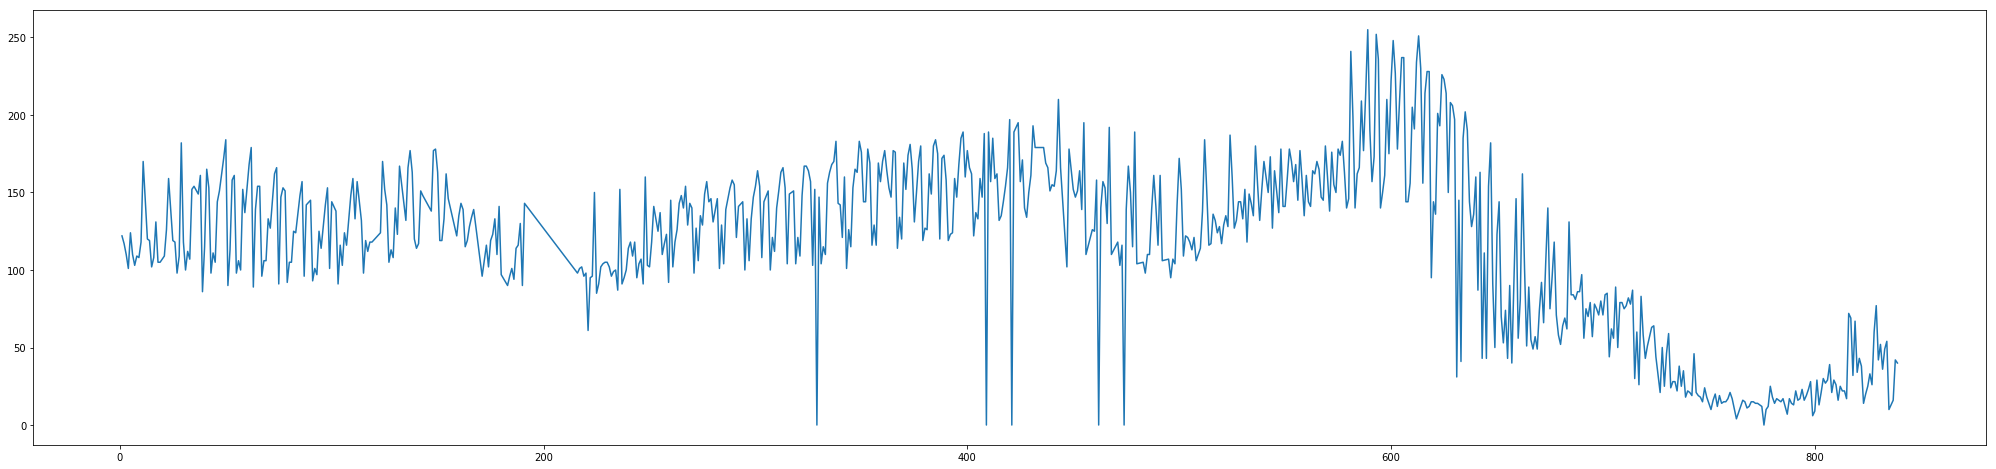

In [135]:
air_data.PM2_5.plot(figsize=(35, 8))

** Delete unused columns**

In [0]:
air_data = air_data.drop(["id", "CityEnglish", "CityAvgAQI","AQI","PM10","O3_8h","Date","Hours"], axis=1)

In [137]:
air_data.head()

,PM2_5,CO,NO2,SO2,O3_1h,AQI_index
1,122,1.3,113,9,45,1
2,117,1.3,123,9,48,1
3,110,1.1,59,2,13,1
4,101,1.4,111,5,2,1
5,124,1.9,191,2,3,1


In [0]:
air_data = air_data.drop(['AQI_index'],axis=1)

In [139]:
air_data.head()

,PM2_5,CO,NO2,SO2,O3_1h
1,122,1.3,113,9,45
2,117,1.3,123,9,48
3,110,1.1,59,2,13
4,101,1.4,111,5,2
5,124,1.9,191,2,3


**Data Normalization**

**Import necessary libraries **

In [0]:

from sklearn import preprocessing

In [141]:
print(air_data.shape)

(762, 5)


**Split data into train and test sets**

In [0]:
x = air_data[['CO','NO2','SO2','O3_1h']]
y = air_data['PM2_5']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.4, random_state =0)


In [0]:
normalized_X = preprocessing.normalize(air_data)

In [144]:
normalized_X

array([[0.70719362, 0.00753567, 0.6550236 , 0.05217002, 0.2608501 ],
       [0.66233229, 0.00735925, 0.69629804, 0.05094864, 0.27172607],
       [0.87635605, 0.00876356, 0.47004552, 0.01593375, 0.10356935],
       ...,
       [0.25603572, 0.00640089, 0.43206029, 0.03200447, 0.86412057],
       [0.330254  , 0.00943583, 0.94358286, 0.01572638, 0.01572638],
       [0.39137819, 0.01174135, 0.91973875, 0.01956891, 0.01956891]])

**Finding the optimum number of clusters for k-means clustering**

In [0]:
from sklearn.cluster import KMeans

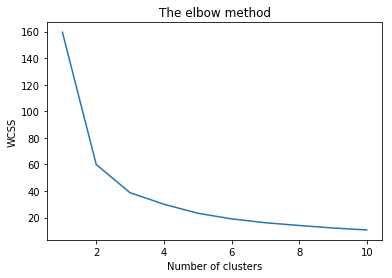

In [146]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(normalized_X)
    wcss.append(kmeans.inertia_)
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

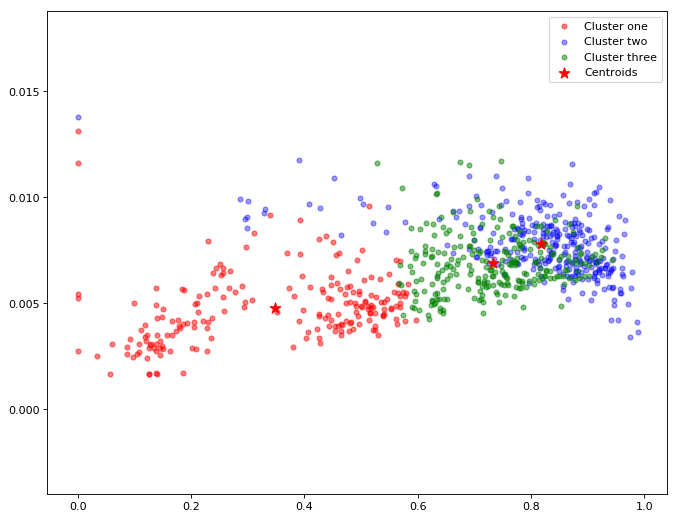

In [148]:
#n_iter = 9
#for i in range(n_iter):
  kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 0)
  y_kmeans = kmeans.fit_predict(normalized_X)

  #print(y_kmeans)

  plt.figure(figsize=(10, 8), dpi=80)
  plt.scatter(normalized_X[y_kmeans == 0, 0], normalized_X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster one',alpha=0.5)
  plt.scatter(normalized_X[y_kmeans == 1, 0], normalized_X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster two', alpha=0.4)
  plt.scatter(normalized_X[y_kmeans == 2, 0], normalized_X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster three', alpha=0.5)

  #plt.scatter(normalized_X[y_kmeans == 3, 0], normalized_X[y_kmeans == 3, 1], s = 20, c = 'pink', label = 'Cluster Four', alpha=0.5)

  #Plotting the centroids of the clusters
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, marker='*' ,c = 'red', label = 'Centroids')

  plt.legend()